In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv("w11q1.csv")
df

,point,x,y
0,p1,1,1
1,p2,3,2
2,p3,9,1
3,p4,3,7
4,p5,7,2
5,p6,9,7
6,p7,4,8
7,p8,8,3
8,p9,1,4


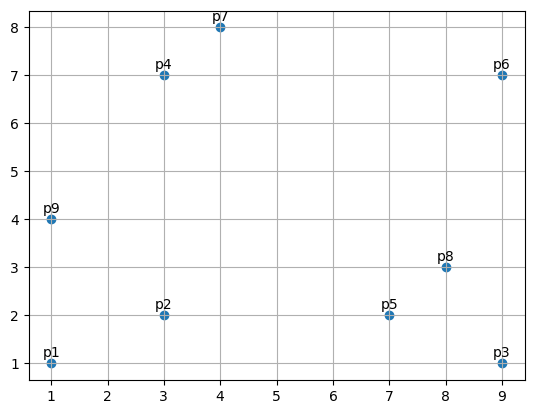

In [70]:
plt.scatter(df['x'],df['y'])
for i in range(len(df)):
    plt.annotate(df['point'][i], (df['x'][i], df['y'][i]), textcoords="offset points", xytext=(0,5), ha='center')
plt.grid()
plt.show()

In [71]:
points = df[['x', 'y']].values    

In [72]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p):
    return np.power(np.sum(np.abs(a - b) ** p), 1/p)

In [73]:
def proximity_matrix(data, distance_func, p=None):
    n = data.shape[0]
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            if distance_func == minkowski_distance:
                dist = distance_func(data[i], data[j], p)
            else:
                dist = distance_func(data[i], data[j])
            matrix[i][j] = dist
            matrix[j][i] = dist
    return matrix

In [74]:
print("Proximity Matrix (Euclidean):")
print(proximity_matrix(points, euclidean_distance))

Proximity Matrix (Euclidean):
[[ 0.          2.23606798  8.          6.32455532  6.08276253 10.
   7.61577311  7.28010989  3.        ]
 [ 2.23606798  0.          6.08276253  5.          4.          7.81024968
   6.08276253  5.09901951  2.82842712]
 [ 8.          6.08276253  0.          8.48528137  2.23606798  6.
   8.60232527  2.23606798  8.54400375]
 [ 6.32455532  5.          8.48528137  0.          6.40312424  6.
   1.41421356  6.40312424  3.60555128]
 [ 6.08276253  4.          2.23606798  6.40312424  0.          5.38516481
   6.70820393  1.41421356  6.32455532]
 [10.          7.81024968  6.          6.          5.38516481  0.
   5.09901951  4.12310563  8.54400375]
 [ 7.61577311  6.08276253  8.60232527  1.41421356  6.70820393  5.09901951
   0.          6.40312424  5.        ]
 [ 7.28010989  5.09901951  2.23606798  6.40312424  1.41421356  4.12310563
   6.40312424  0.          7.07106781]
 [ 3.          2.82842712  8.54400375  3.60555128  6.32455532  8.54400375
   5.          7.0710678

In [75]:
print("Proximity Matrix (Manhattan):")
print(proximity_matrix(points, manhattan_distance))

Proximity Matrix (Manhattan):
[[ 0.  3.  8.  8.  7. 14. 10.  9.  3.]
 [ 3.  0.  7.  5.  4. 11.  7.  6.  4.]
 [ 8.  7.  0. 12.  3.  6. 12.  3. 11.]
 [ 8.  5. 12.  0.  9.  6.  2.  9.  5.]
 [ 7.  4.  3.  9.  0.  7.  9.  2.  8.]
 [14. 11.  6.  6.  7.  0.  6.  5. 11.]
 [10.  7. 12.  2.  9.  6.  0.  9.  7.]
 [ 9.  6.  3.  9.  2.  5.  9.  0.  8.]
 [ 3.  4. 11.  5.  8. 11.  7.  8.  0.]]


In [76]:
print("Proximity Matrix (Minkowski, p=3):")
print(proximity_matrix(points, minkowski_distance, p=3))

Proximity Matrix (Minkowski, p=3):
[[0.         2.08008382 8.         6.07317794 6.00924501 8.99588289
  7.17905435 7.05400406 3.        ]
 [2.08008382 0.         6.00924501 5.         4.         6.98636803
  6.00924501 5.01329793 2.5198421 ]
 [8.         6.00924501 0.         7.5595263  2.08008382 6.
  7.76393608 2.08008382 8.13822304]
 [6.07317794 5.         7.5595263  0.         5.73879355 6.
  1.25992105 5.73879355 3.27106631]
 [6.00924501 4.         2.08008382 5.73879355 0.         5.10446872
  6.24025147 1.25992105 6.07317794]
 [8.99588289 6.98636803 6.         6.         5.10446872 0.
  5.01329793 4.02072576 8.13822304]
 [7.17905435 6.00924501 7.76393608 1.25992105 6.24025147 5.01329793
  0.         5.73879355 4.49794145]
 [7.05400406 5.01329793 2.08008382 5.73879355 1.25992105 4.02072576
  5.73879355 0.         7.00679612]
 [3.         2.5198421  8.13822304 3.27106631 6.07317794 8.13822304
  4.49794145 7.00679612 0.        ]]


In [77]:
def calculate_sse(clusters, data):
    sse = 0
    for cluster in np.unique(clusters):
        cluster_points = data[clusters == cluster]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            sse += np.sum((cluster_points - centroid) ** 2)
    return sse

In [78]:
def single_linkage(cluster1, cluster2):
    return np.min([euclidean_distance(p1, p2) for p1 in cluster1 for p2 in cluster2])

def complete_linkage(cluster1, cluster2):
    return np.max([euclidean_distance(p1, p2) for p1 in cluster1 for p2 in cluster2])

def average_linkage(cluster1, cluster2):
    return np.mean([euclidean_distance(p1, p2) for p1 in cluster1 for p2 in cluster2])

def ward_linkage(cluster1, cluster2, data):
    new_cluster = np.vstack((cluster1, cluster2))
    return np.sum((new_cluster - np.mean(new_cluster, axis=0)) ** 2)

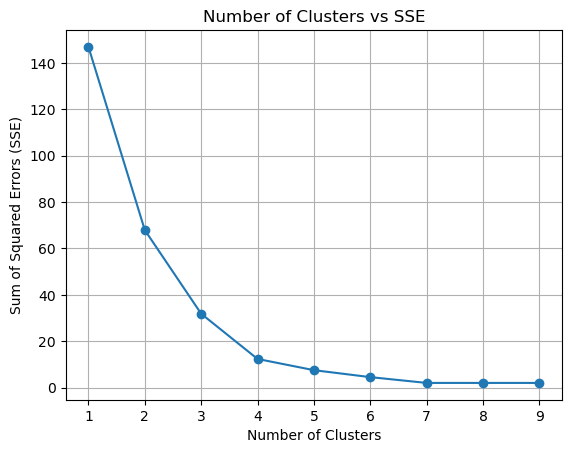

In [84]:
def plot_sse(data):
    sse_list = []
    for num_clusters in range(1, len(data) + 1):
        clusters = sch.fcluster(sch.linkage(data, method='ward'), num_clusters, criterion='maxclust')
        sse = calculate_sse(clusters, data)
        sse_list.append(sse)
    
    plt.figure()
    plt.plot(range(1, len(data) + 1), sse_list, marker='o')
    plt.title('Number of Clusters vs SSE')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.grid()
    plt.show()

plot_sse(points)

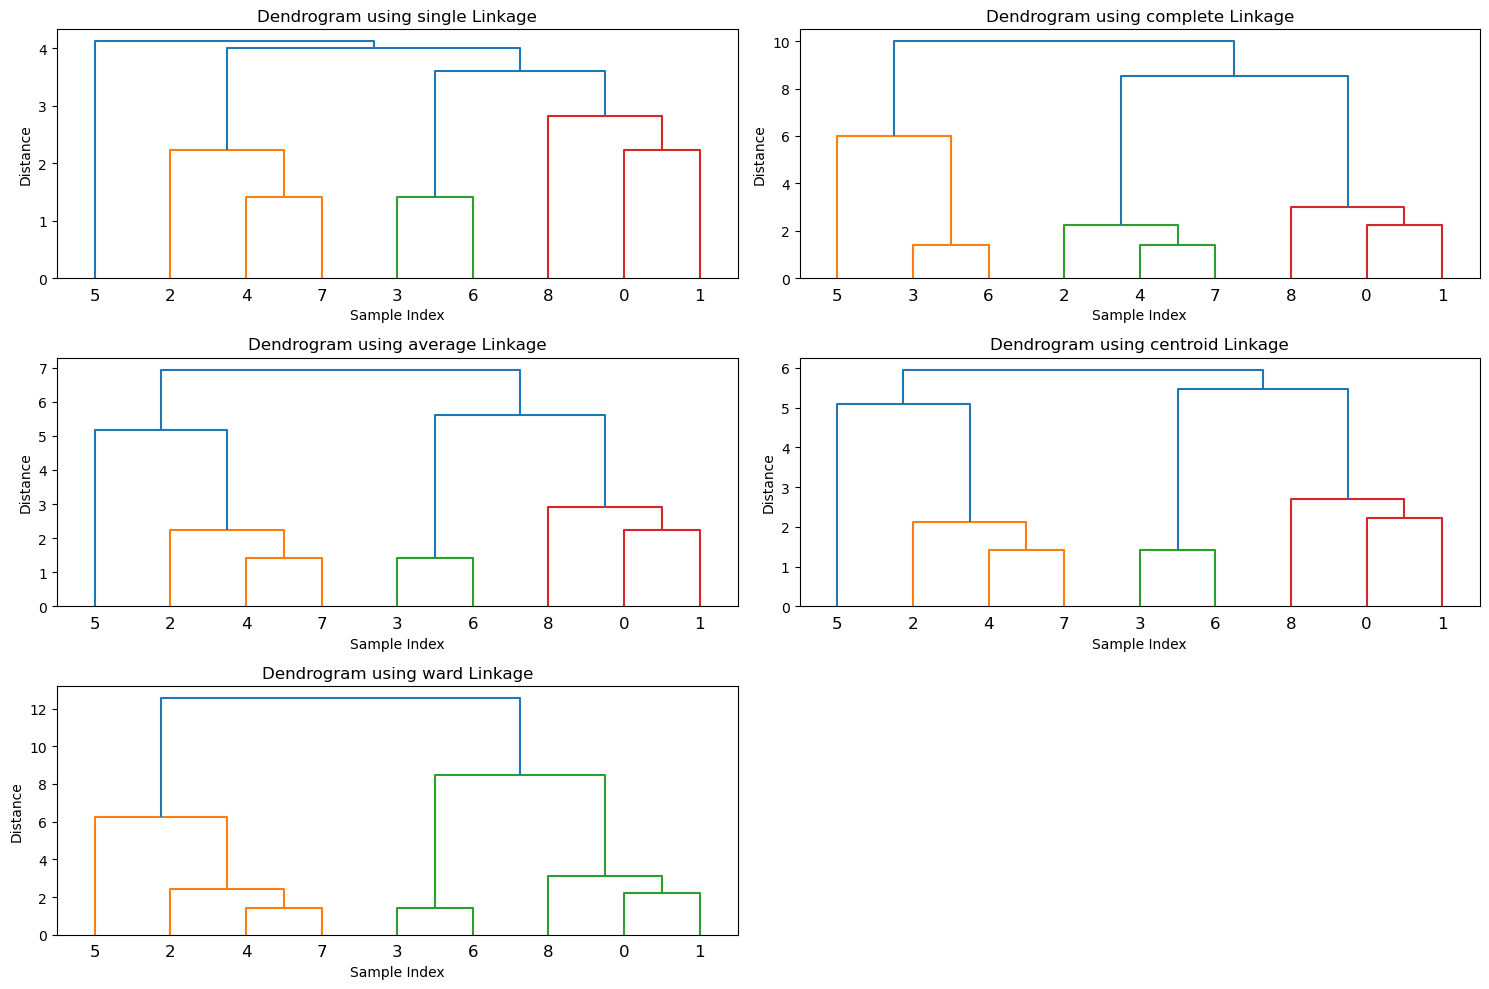

In [87]:
def plot_dendrogram(data):
    methods = ['single', 'complete', 'average', 'centroid', 'ward']
    
    plt.figure(figsize=(15, 10))
    for i, method in enumerate(methods):
        plt.subplot(3, 2, i + 1)
        linkage_matrix = sch.linkage(data, method=method)
        sch.dendrogram(linkage_matrix)
        plt.title(f'Dendrogram using {method} Linkage')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()
    
plot_dendrogram(points)